In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, norm

In [2]:
def gen_lambda_dist(a, b): return gamma(a, scale=b)
def gen_mu_dist(mu_0, beta, lmd): return norm(loc=mu_0, scale=1/lmd)

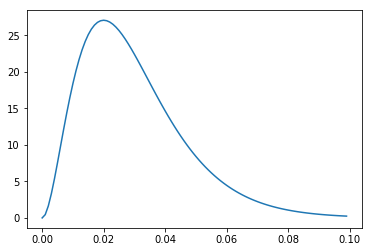

In [13]:
lambda_dist = gen_lambda_dist(3.0, 0.01)

xs = np.arange(0, 0.1, 0.001)
ys = [lambda_dist.pdf(x) for x in xs]
plt.plot(xs, ys)
plt.show()

104.56559115312666


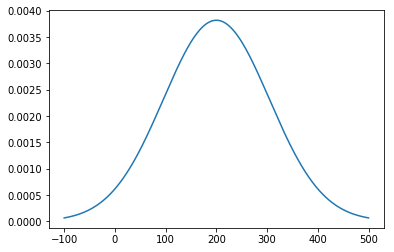

In [14]:
lmd = lambda_dist.rvs()
mu_dist = gen_mu_dist(200, 1, lmd)
print(1/lmd)

xs = np.arange(-100, 500, 0.1)
ys = [ mu_dist.pdf(x) for x in xs]
plt.plot(xs, ys)
plt.show()